**Step 1: Import Libraries**

In [8]:
# Import necessary libraries
import numpy as np  # For numerical operations and array manipulations
import matplotlib.pyplot as plt  # For creating visualizations and plotting graphs

**Step 2: Generating Noisy Data with added gaussian noise**

Text(0.5, 1.0, 'Scatter Plot of Noisy Linear Data')

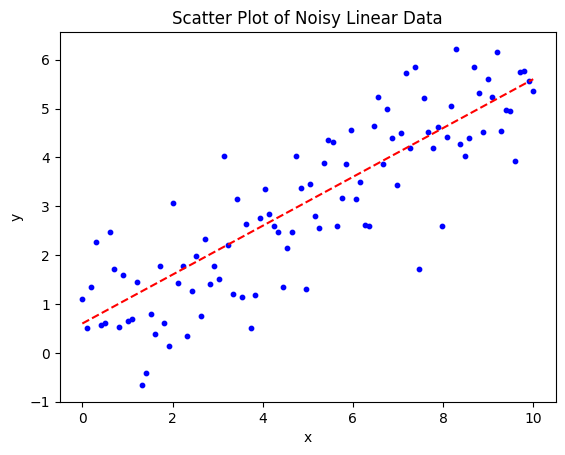

In [9]:
# Set random seed for reproducibility
np.random.seed(42)  # Ensures that the random numbers generated are the same every time the code is run

# Generate independent variable (x)
x = np.linspace(0, 10, 100)  # Create 100 evenly spaced points between 0 and 10

# Define true slope (m1) and intercept (m2)
m1_true, m2_true = 0.5, 0.6  # True values for the slope and intercept of the line

# Generate dependent variable (y) with added Gaussian noise
y = m1_true * x + m2_true + np.random.normal(0, 1, 100)  #line equation for the function to calculate the dependent variable y with added gausian noises to mimic the real world scenarios

# Plot the dataset
plt.scatter(x, y, color='blue', s=10, label="Noisy Data")  # Scatter plot of the noisy data points
plt.plot(x, m1_true * x + m2_true, color='red', linestyle='dashed', label="y = 0.5x + 0.6")  # Plot the true line
plt.xlabel("x")  # Label for the x-axis
plt.ylabel("y")  # Label for the y-axis
plt.title("Scatter Plot of Noisy Linear Data")  # Title of the plot

**Step 3: Calculating Mean Squared Error (L2 Error) -> Loss function of the true line**

Text(0.5, 1.0, 'Loss Function vs m1')

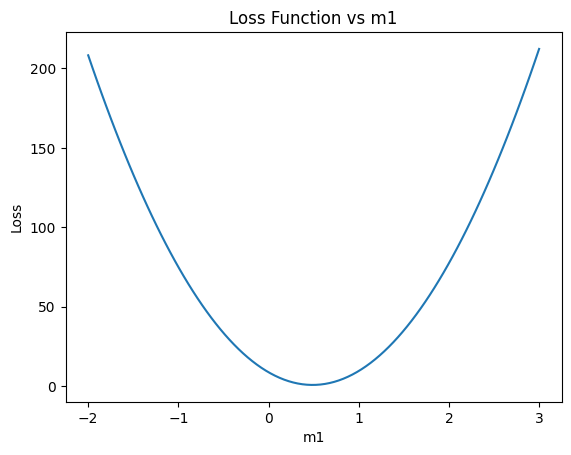

In [10]:
# Define the loss function (Mean Squared Error)
def loss_function(m1, m2):
    """
    Calculate the Mean Squared Error (MSE) between the predicted and actual y values

    Parameters:
        m1 (float): Slope of the line
        m2 (float): Intercept of the line

    Returns:
        float: Mean Squared Error
    """
    y_pred = m1 * x + m2  # Predicted y values based on the current m1 and m2
    return np.mean((y_pred - y) ** 2)  # Calculate the mean squared error

# Plot the loss function for m1 by keeping m2 fixed at its true value
m1_values = np.linspace(-2, 3, 100)  # Generate 100 values of m1 between -2 and 3 for testing purpose to find the best fit m value where loss is minimum
loss_values = [loss_function(m1, m2_true) for m1 in m1_values]  # Calculate loss for each m1 value

# Plot the loss function
plt.plot(m1_values, loss_values, label='Loss Function')  # Plot m1 vs loss
plt.xlabel('m1')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.title('Loss Function vs m1')  # Title of the plot

**Step 4: Determining the best fit m1 value using linear search**

Linear Search : Best fit m1 value where loss function is minimum : 0.4747474747474749, Loss: 0.828368640368441


Text(0.5, 1.0, 'Linear Search: Best Fit m1')

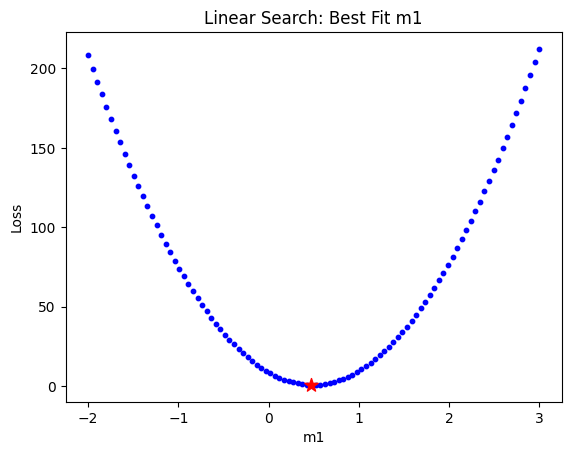

In [11]:
best_fit_m1 = None  # Variable to store the best-fit m1 value
minimum_loss = float('inf')  # Variable to store the minimum loss, initialized to infinity

# Iterate through all m1 values to find the one that minimizes the loss function
for m1 in m1_values:
    current_loss = loss_function(m1, m2_true)  # Calculate the loss for the current m1 value
    if current_loss < minimum_loss:  # Check if the current loss is less than the minimum loss found so far
        minimum_loss = current_loss  # Update the minimum loss
        best_fit_m1 = m1  # Update the best-fit m1 value

# Print the results of the linear search
print(f"Linear Search : Best fit m1 value where loss function is minimum : {best_fit_m1}, Loss: {minimum_loss}")

# Plot the results of the linear search
plt.scatter(m1_values, loss_values, color='blue', s=10, label='Linear Search Points')  # Plot all m1 values and their corresponding losses
plt.scatter(best_fit_m1, minimum_loss, color='red', s=100, marker='*', label='Best Fit m1')  # Highlight the best-fit m1 value
plt.xlabel('m1')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.title('Linear Search: Best Fit m1')  # Title of the plot

**Step 5: Determining the best fit m1 value using Gradient Descent Method**

In [12]:
# Gradient Descent function to optimize the slope parameter (m1) of a linear model
def gradient_descent(m1_start, learning_rate, epochs):
    """
    Perform gradient descent to find the best value of m1 that minimizes the loss.

    Args:
        m1_start (float): Initial guess for the slope parameter (m1).
        learning_rate (float): Step size for updating m1 during each iteration.
        epochs (int): Maximum number of iterations to run the algorithm.

    Returns:
        float: The optimized value of m1 after running gradient descent.
    """
    m1 = m1_start  # Start with the initial value of m1

    # Loop through the specified number of epochs (iterations)
    for _ in range(epochs):
        # Compute the gradient of the loss function with respect to m1
        # This is the derivative of the mean squared error loss
        gradient = np.mean(2 * (m1 * x + m2_true - y) * x)

        # Update m1 by moving in the direction opposite to the gradient
        # The learning rate controls how big each step is
        m1 -= learning_rate * gradient

    return m1  # Return the optimized value of m1


# Initialize the starting parameters for gradient descent
m1_start = 0.1  # Initial guess for the slope (m1)
learning_rate = 0.01  # How fast the algorithm learns (step size)
epochs = 1000  # Maximum number of iterations to run

# Run gradient descent to find the best value of m1
best_m1_gd = gradient_descent(m1_start, learning_rate, epochs)

# Calculate the loss for the optimized m1 using the loss function
best_loss_gd = loss_function(best_m1_gd, m2_true)

# Print the results
print(f"Best m1 (Gradient Descent): {best_m1_gd}, Loss: {best_loss_gd}")


'''
To avoid unnecessary computations, we can add early stopping conditions:
1. Stop if the change in m1 is too small (convergence).
2. Stop if the loss function stops decreasing significantly.

For example, we can add the following logic inside the gradient descent loop:

    # Store the previous value of m1 for comparison
    prev_m1 = m1

    # Check if the change in m1 is smaller than a tolerance level
    if abs(m1 - prev_m1) < tolerance:
        print(f"Stopped early at epoch {epoch} because m1 is no longer changing much.")
        break

    # Update prev_m1 for the next iteration
    prev_m1 = m1

This way, the algorithm stops early if it's no longer making meaningful progress.
'''

Best m1 (Gradient Descent): 0.4880016001703345, Loss: 0.8224833379603175


'\nTo avoid unnecessary computations, we can add early stopping conditions:\n1. Stop if the change in m1 is too small (convergence).\n2. Stop if the loss function stops decreasing significantly.\n\nFor example, we can add the following logic inside the gradient descent loop:\n\n    # Store the previous value of m1 for comparison\n    prev_m1 = m1\n\n    # Check if the change in m1 is smaller than a tolerance level\n    if abs(m1 - prev_m1) < tolerance:\n        print(f"Stopped early at epoch {epoch} because m1 is no longer changing much.")\n        break\n\n    # Update prev_m1 for the next iteration\n    prev_m1 = m1\n\nThis way, the algorithm stops early if it\'s no longer making meaningful progress.\n'

**Step 6: Recursively trying to find global minima if we get stuck at local minima**

In [15]:
# Initialize variables to track the best m1 and the minimum loss found
best_m1_overall = None  # Will store the best m1 value across all runs
min_loss_overall = float('inf')  # Start with a very high loss value (infinity) to ensure any real loss is smaller

# Try 10 different random starting points for m1 to avoid getting stuck in a local minimum
for _ in range(10):
    # Generate a random starting value for m1 between -10 and 10
    m1_start = np.random.uniform(-10, 10)

    # Run gradient descent to find the best m1 for this starting point
    best_m1 = gradient_descent(m1_start, learning_rate, epochs)

    # Calculate the loss for the current best_m1
    loss = loss_function(best_m1, m2_true, x, y)

    # Check if this run gave a better loss than the previous best
    if loss < min_loss_overall:
        min_loss_overall = loss  # Update the minimum loss
        best_m1_overall = best_m1  # Update the best m1

# Print the best m1 and the corresponding loss after all runs
print(f"Best m1 after multiple runs: {best_m1_overall}, Loss: {min_loss_overall}")

Best m1 after multiple runs: 0.48800160017033456, Loss: 0.8224833379603175
